# Set of tools to visualize plots generated by Matlab

In [38]:
from pathlib import Path
import sys
import os
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib as mpl
import gsw
import cartopy.crs as ccrs

path_MEOP_analyses = os.fspath(Path.home() / 'MEOP_analyses/')
if not (path_MEOP_analyses in sys.path):
        sys.path.insert(0,path_MEOP_analyses)

from importlib import reload
import meop
import meop_metadata
import meop_plot_data
reload(meop)
reload(meop_metadata)
reload(meop_plot_data)

<module 'meop_plot_data' from '/media/disk2/roquet/MEOP_process/python/meop_plot_data.py'>

In [23]:
lprofiles, ltags, ldeployments = meop_metadata.read_list_profiles(rebuild=False,verbose=False,public=True,Tdata=False)

In [24]:
ldeployments.set_index('DEPLOYMENT_CODE').loc['ft23']

JULD                 2018-10-26 05:00:00.000003
LATITUDE                               -43.2755
LONGITUDE                              -59.0225
N_PROF_TEMP                                1001
N_PROF_PSAL                                1001
N_PROF_CHLA                                  91
N_TAGS                                        8
PI_CODE                                  GUINET
PROCESS                                       1
PUBLIC                                        1
COUNTRY                                  FRANCE
FIRST_VERSION               MEOP-CTD_2020-01-02
LAST_VERSION                MEOP-CTD_2020-01-02
temp_error                                 0.05
psal_error                                 0.05
minT                                         -3
maxT                                         32
minS                                          4
maxS                                         40
min_Nprof                                    30
pmax                                    

(<Figure size 720x720 with 1 Axes>,
 <cartopy.mpl.geoaxes.GeoAxesSubplot at 0x7f0d7ff22550>)

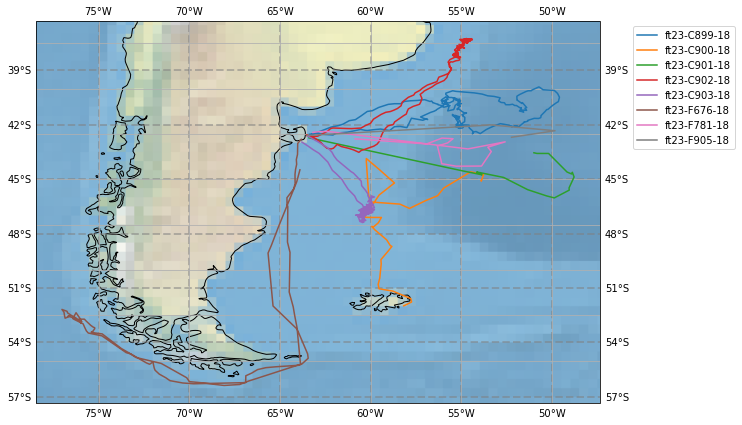

In [28]:
deployment = 'ft23'
meop_plot_data.plot_map_deployments(lprofiles[lprofiles.DEPLOYMENT_CODE==deployment])

In [29]:
# show descriptive plots for a given deployment
deployment = 'ft23'
meop_plot_data.show_plots_depl(deployment,'_lr1')
#meop.show_plots_depl(EXP,'_hr1')
#meop.show_plots_depl(EXP,'_hr2')

In [39]:
# show descriptive plots for a given tag
smru_name = 'ft23-C899-18'
meop_plot_data.show_plots_tag(smru_name,qf='_hr1')

(<Figure size 864x648 with 5 Axes>,
 {'T': <matplotlib.axes._subplots.AxesSubplot at 0x7f0d81901850>,
  'S': <matplotlib.axes._subplots.AxesSubplot at 0x7f0d808821d0>,
  'D': <matplotlib.axes._subplots.AxesSubplot at 0x7f0d824964d0>,
  'TS': <matplotlib.axes._subplots.AxesSubplot at 0x7f0d83be1890>,
  'xy': <cartopy.mpl.geoaxes.GeoAxesSubplot at 0x7f0d8066ce50>})

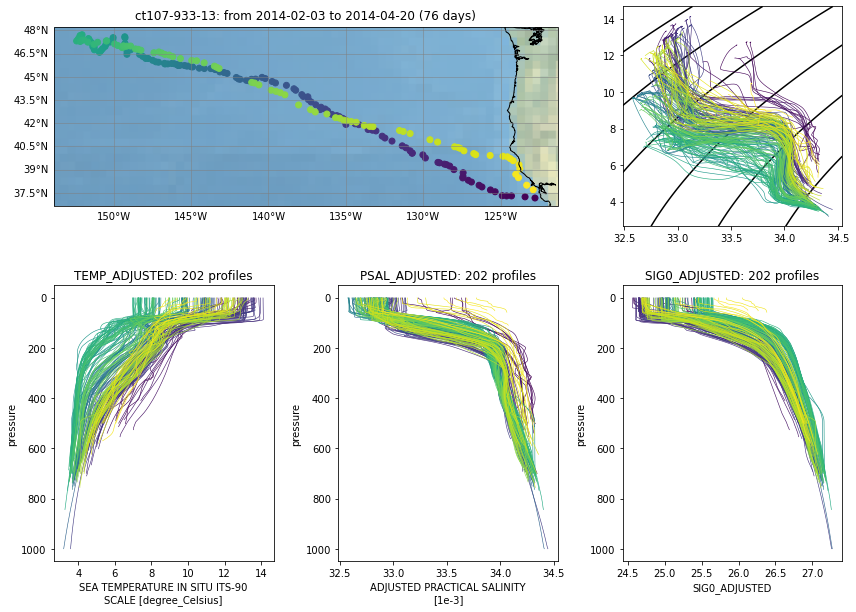

In [41]:
smru_name = 'ct107-933-13'
qf='hr1'
fname = meop.fname_prof(smru_name,qf=qf)
ds = meop.open_dataset(fname)
ds.plot_data_tags()

In [47]:
smru_name

'ct107-933-13'

In [50]:
#! python meop_process.py --smru_name ct107-933-13 --descriptive_plots
meop_plot_data.show_png(meop.fname_plots(smru_name,qf=qf,suffix='profiles'))
meop_plot_data.show_png(meop.fname_plots(smru_name,qf=qf,suffix='sections'))

In [54]:
deployment = 'ct107'
qf='hr1'

list_tags = lprofiles[lprofiles.DEPLOYMENT_CODE==deployment].groupby('SMRU_PLATFORM_CODE').sum().index

In [55]:
list_tags

Index(['ct107-933-13', 'ct107-933b-13', 'ct107-934-13-N1', 'ct107-934-13-N2',
       'ct107-938-13-N1', 'ct107-938-13-N2', 'ct107-940-13', 'ct107-941-13-N1',
       'ct107-941-13-N2', 'ct107-947-13-N1', 'ct107-947-13-N2',
       'ct107-950-13-N1', 'ct107-950-13-N2', 'ct107-951-13-N1',
       'ct107-951-13-N2', 'ct107-952-13-N1', 'ct107-952-13-N2',
       'ct107-953-13-N1', 'ct107-953-13-N2', 'ct107-F945-13',
       'ct107-F946-13-N1', 'ct107-F946-13-N2', 'ct107-F954-14',
       'ct107-F995-14'],
      dtype='object', name='SMRU_PLATFORM_CODE')

(<Figure size 864x648 with 5 Axes>,
 {'T': <matplotlib.axes._subplots.AxesSubplot at 0x7f0d3acebd10>,
  'S': <matplotlib.axes._subplots.AxesSubplot at 0x7f0d3ad208d0>,
  'D': <matplotlib.axes._subplots.AxesSubplot at 0x7f0d3b09ae50>,
  'TS': <matplotlib.axes._subplots.AxesSubplot at 0x7f0d3b4203d0>,
  'xy': <cartopy.mpl.geoaxes.GeoAxesSubplot at 0x7f0d3b6eb190>})

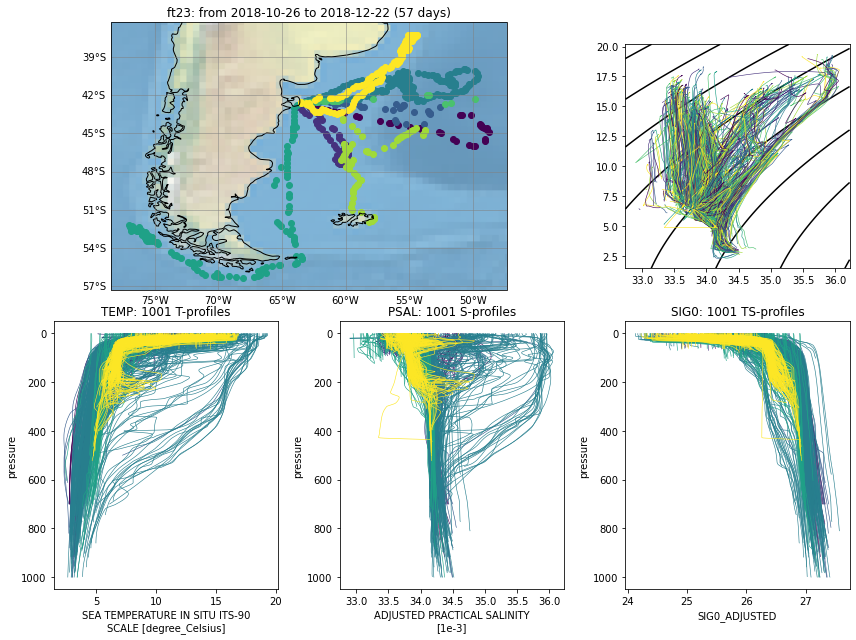

In [105]:
reload(meop)
reload(meop_plot_data)
deployment = 'ft23'
meop_plot_data.plot_data_deployments(deployment)

In [104]:
# navigate through descriptive plots for a given list of tags
deployment = 'ft23'
list_files = meop.list_fname_plots(deployment=deployment,suffix='profiles')
meop_plot_data.scroll_descriptive_plots_depl(list_files)

interactive(children=(BoundedIntText(value=0, description='Figure:', max=22), Dropdown(description='file:', op…

In [54]:
# navigate through calibration plots for a given list of tags
EXP = 'ct107'
list_files = sorted(Path(processdir,'calibration_plots',EXP).glob('**/calibration_*_0.png'))
meop.scroll_calibration_plots_depl(list_files)

interactive(children=(BoundedIntText(value=0, description='Figure:', max=21), Dropdown(description='file:', op…